#Entraînement de la détection d'objets YOLOv8 sur un jeu de données personnalisé
Ce notebook détaille les étapes pour entraîner un modèle de détection d'objets YOLOv8 sur un jeu de données personnalisé. Les étapes couvertes sont les suivantes :

1. Installationde YOLOv8
2. Préparation d'un jeu de données personnalisé
3. Entraînement personnalisé
4. Validation du modèle personnalisé
5. Inférence avec le modèle personnalisé**


## Avant de commencer
# accès à un GPU
Avant de commencer, nous allons vérifier que nous avons accès à un GPU. Nous pouvons utiliser la commande nvidia-smi pour cela.

Le GPU accélère significativement l'entraînement des modèles de deep learning comme YOLOv8, optimisant ainsi les performances du processus d'entraînement.

In [ ]:
!nvidia-smi

Sun May 19 14:10:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Cela confirme que nous avons accès à un GPU (Tesla T4 dans ce cas) et qu'il est actuellement disponible pour une utilisation.


Le code ci-dessous obtient le répertoire de travail actuel et l'enregistre dans la variable **HOME**, puis affiche ce répertoire.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content



Le répertoire **/content** est le répertoire de travail actuel dans un environnement comme Google Colab.

texte en italique## Installation de YOLOv8

Pour installer YOLOv8, nous avons deux options : l'installer à partir de la source(github) ou l'installer via pip. Cette flexibilité est due au fait que YOLOv8 est la première itération de YOLO à avoir un package officiel.

Nous allons l'installer directement depuis l'Index Python Package (PyPI) en utilisant pip :


In [ ]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output() # Elles sont généralement utilisées pour effacer la sortie de la cellule dans un notebook Jupyter

import ultralytics
ultralytics.checks() # pour s'assurer que l'installation s'est déroulée

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO


from IPython.display import display, Image

**from ultralytics import YOLO:** Cette ligne importe la classe YOLO à partir de la bibliothèque ultralytics. La classe **YOLO** est utilisée pour créer une instance du modèle YOLO et effectuer des opérations de détection d'objets.

**from IPython.display import display, Image:** Cette ligne importe les fonctions display et Image à partir de la bibliothèque IPython.display. La fonction display est utilisée pour afficher des objets dans un notebook Jupyter, tandis que la classe Image est utilisée pour représenter des images dans un notebook.



## Étape 1 : Préparation d'un jeu de données personnalisé avec Roboflow

Roboflow est une plateforme en ligne qui fournit des outils et des services pour la gestion des données et le développement de modèles de vision par ordinateur, y compris la détection d'objets. Bien que Roboflow ne soit pas directement lié au développement de YOLO, il fournit des fonctionnalités qui facilitent l'utilisation de modèles comme YOLO pour la détection d'objets.


##Prétraitement des données  :
Roboflow offre des outils pour prétraiter et annoter les données d'images avant de les utiliser pour entraîner des modèles de détection d'objets comme YOLO. Cela peut inclure le redimensionnement des images, la normalisation, la conversion des annotations et d'autres transformations.


<div align="center">
  <img
    width="640"
    src=""
  >
</div>

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
# Création d'un répertoire nommé datasets dans notre répertoire de travail.

# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ktQDAO5aekLRuImeUQpi")
project = rf.workspace("bibnumberdetection").project("bib-number-x7gbv")
version = project.version(2)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bib-Number-2 in yolov8:: 100%|██████████| 1540/1540 [00:00<00:00, 3912.24it/s]


```
# This is formatted as code

```

## Entraînement Personalisé  (Custom Training)

****Cette commande exécute une tâche d'entraînement YOLO avec les paramètres suivants**** :




*   Listask=detect : Indique que la tâche est la détection d'objets ***(Object detection)***.t item
*   List mode=train : Indique que le modèle est en cours d'entraînement ***(Training)***.
item


*   data={dataset.location}/data.yaml : Spécifie l'emplacement du fichier de configuration des données (data.yaml) qui contient des informations sur l'ensemble de données, telles que les chemins vers les images d'entraînement ***(training data)***, les annotations et les étiquettes de classe ***(labels)***.

*   model=yolov8s.pt : Spécifie le fichier de modèle YOLOv8s (modèle pré-entraîné) à utiliser comme point de départ pour l'entraînement.



*   epochs=25 : Spécifie le nombre d'époques d'entraînement (itérations sur l'ensemble du jeu de données) à effectuer lors de l'entraînement,  Chaque epoch consiste à présenter toutes les données d'entraînement au modèle, calculer la perte (ou l'erreur) sur l'ensemble des données, et mettre à jour les poids du modèle pour minimiser cette perte.

* imgsz=800 : Définit la taille de l'image d'entrée pour l'entraînement à 800x800 pixels.


*   plots=True : Active le traçage de la perte d'entraînement ***(loss -->  mesure de l'erreur entre les prédictions du modèle et les vraies valeurs (ou labels) des données d'entraînement)*** et d'autres métriques **(Performance Metrics)** pendant l'entraînement.






In [ ]:
 %cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 184MB/s]
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Bib-Number-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buf

In [ ]:
 !ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1716128129.c91aebc15a7e.1811.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch510.jpg	weights
P_curve.png					    train_batch511.jpg
PR_curve.png					    train_batch512.jpg


#Remarques sur ces resultats:

*  confusion_matrix_normalized.png : Matrice de confusion normalisée montrant les performances du modèle dans la classification des différentes classes.
* confusion_matrix.png : Matrice de **confusion** montrant le nombre de vrais positifs, de faux positifs, de vrais négatifs et de faux négatifs pour chaque classe.
* results.csv : Fichier CSV contenant des résultats détaillés de l'évaluation du modèle.
* results.png : Image PNG résumant les résultats de l'évaluation.
* train_batch*.jpg : Images JPEG montrant des visualisations des lots d'entraînement pendant le processus d'entraînement.
* val_batch*.jpg : Images JPEG montrant des visualisations des lots de validation pendant le processus d'entraînement.
* R_curve.png : Graphique de la courbe de  ***(Recall or Sensitivity)*** montrant les valeurs de précision et de rappel à différents seuils.
* F1_curve.png : Graphique de la courbe du score F1 ***(F1-Score)*** montrant le score F1 à différents seuils .
* labels.jpg : Image JPEG représentant les étiquettes de classe ***(class labels)***.
* P_curve.png : Graphique de la courbe de précision ***(Precision)*** montrant les valeurs de précision à différents seuils .



/content


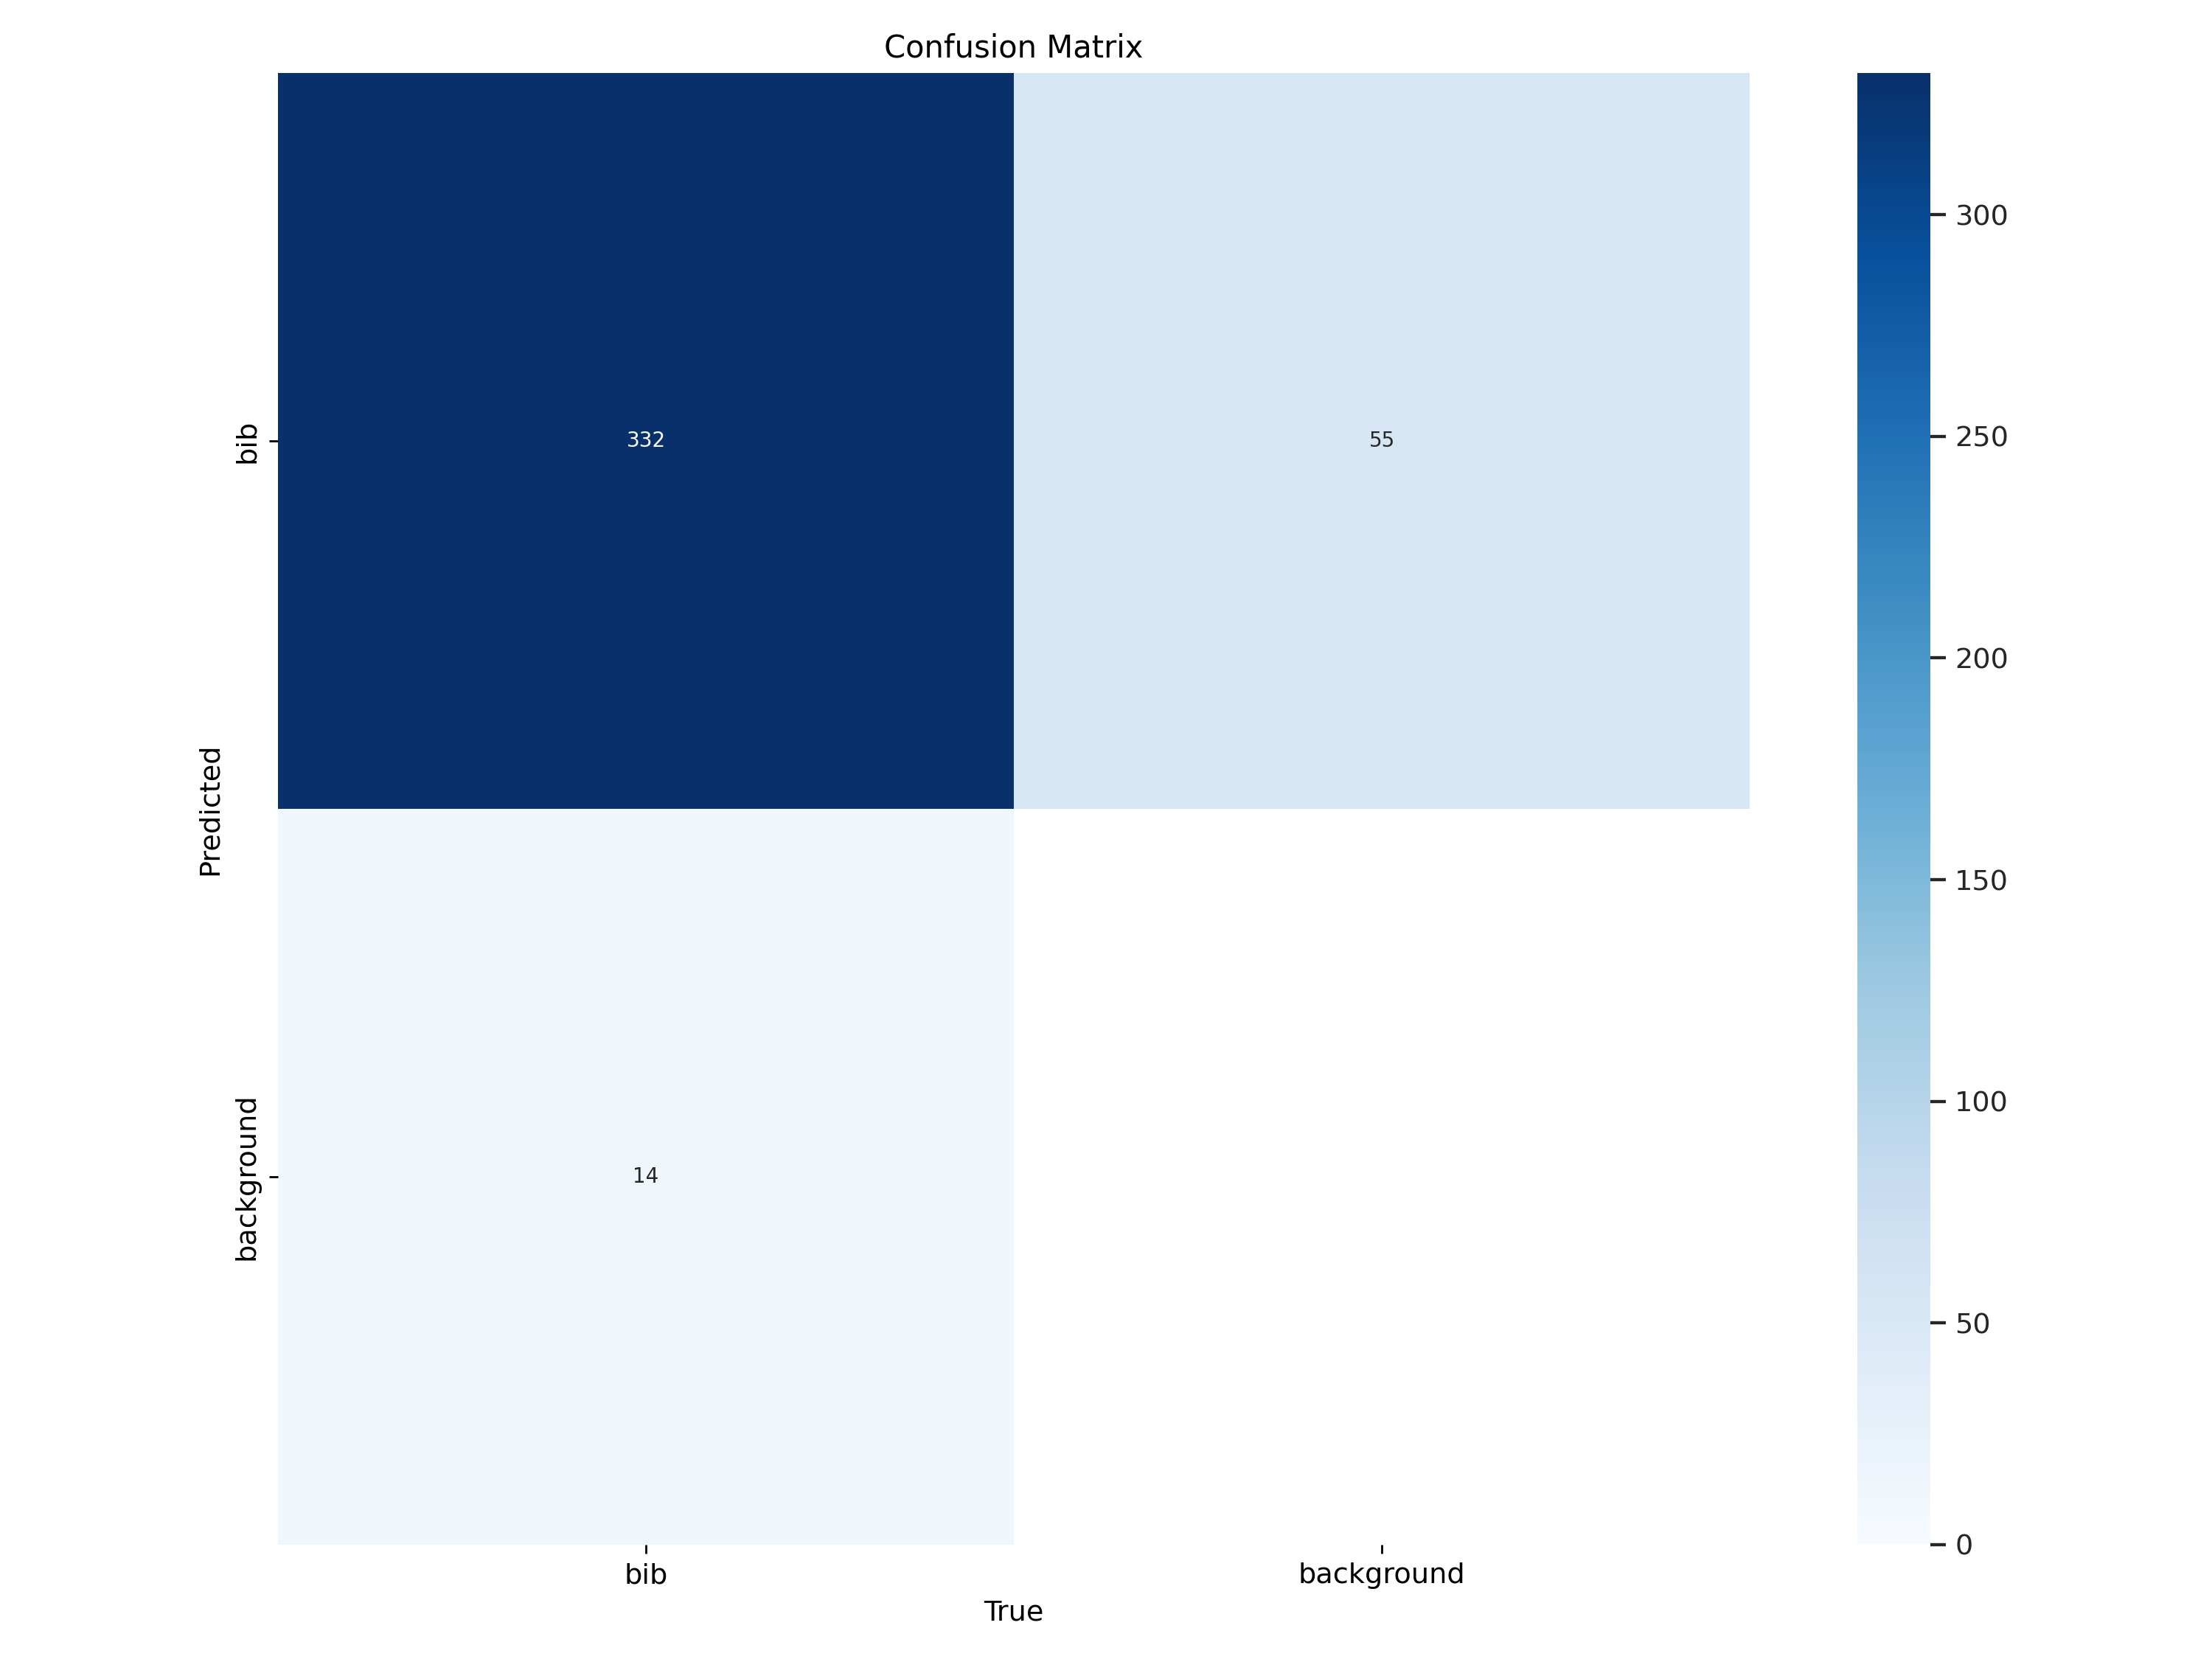

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

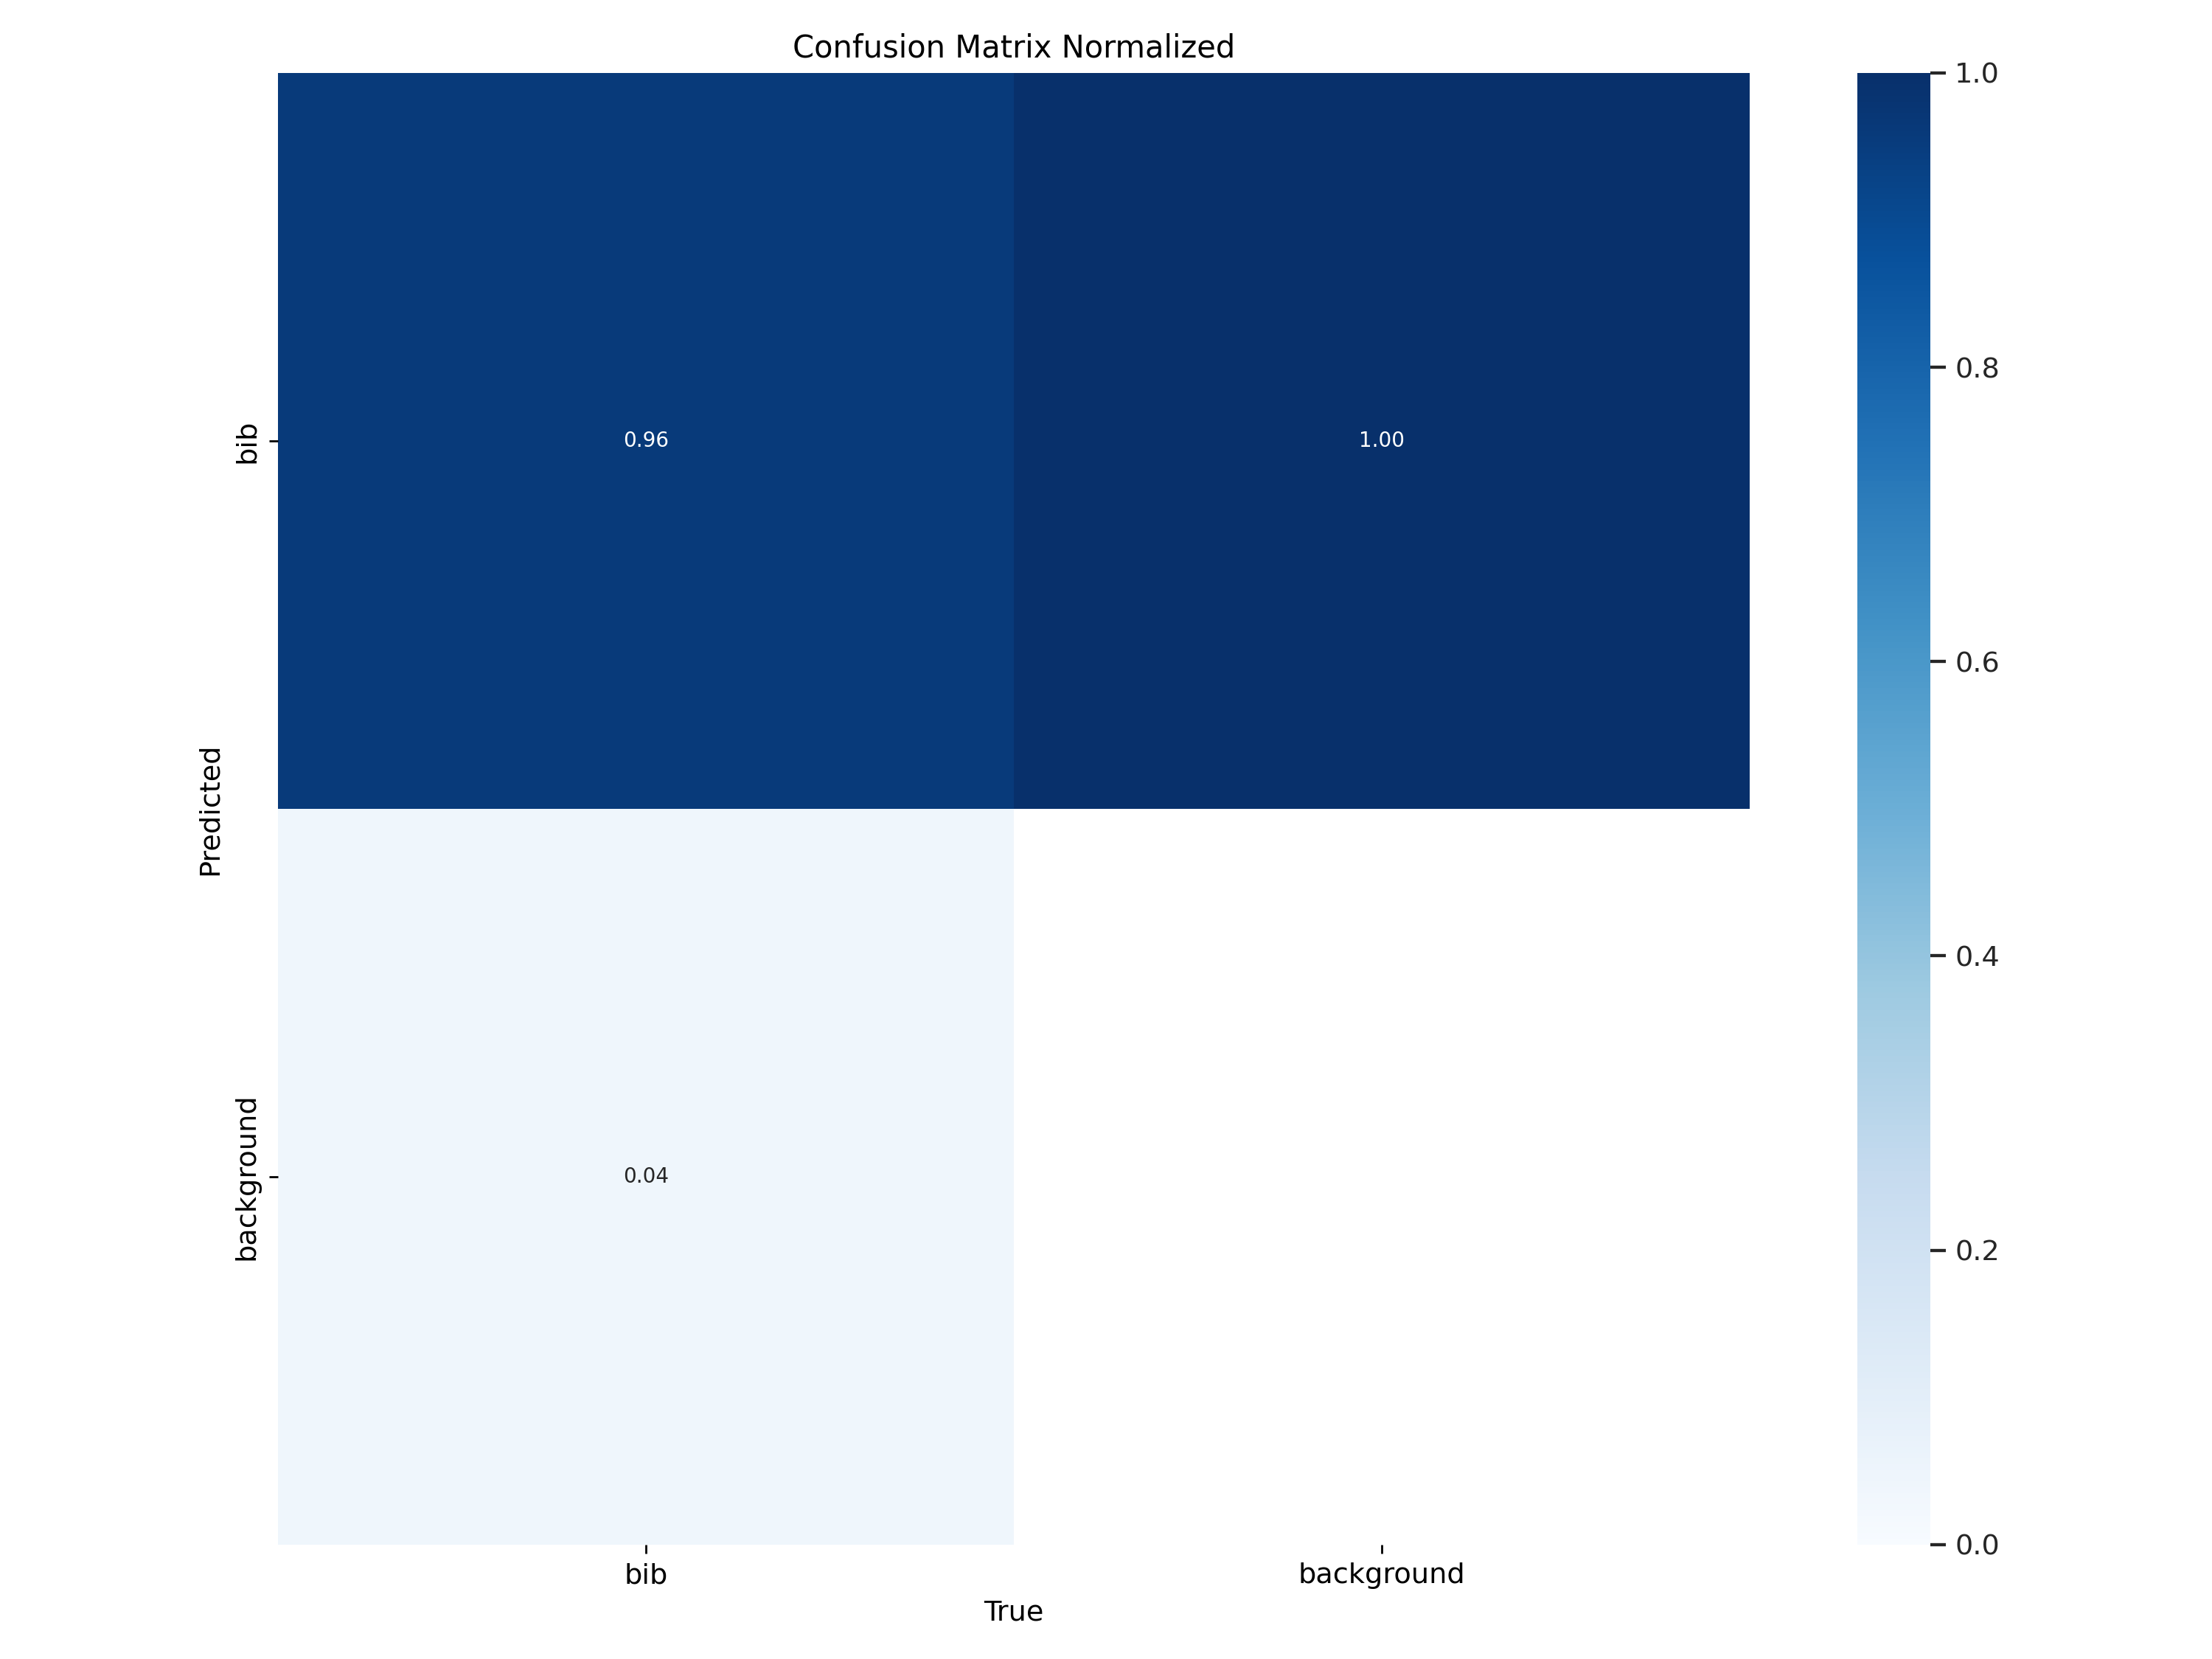

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

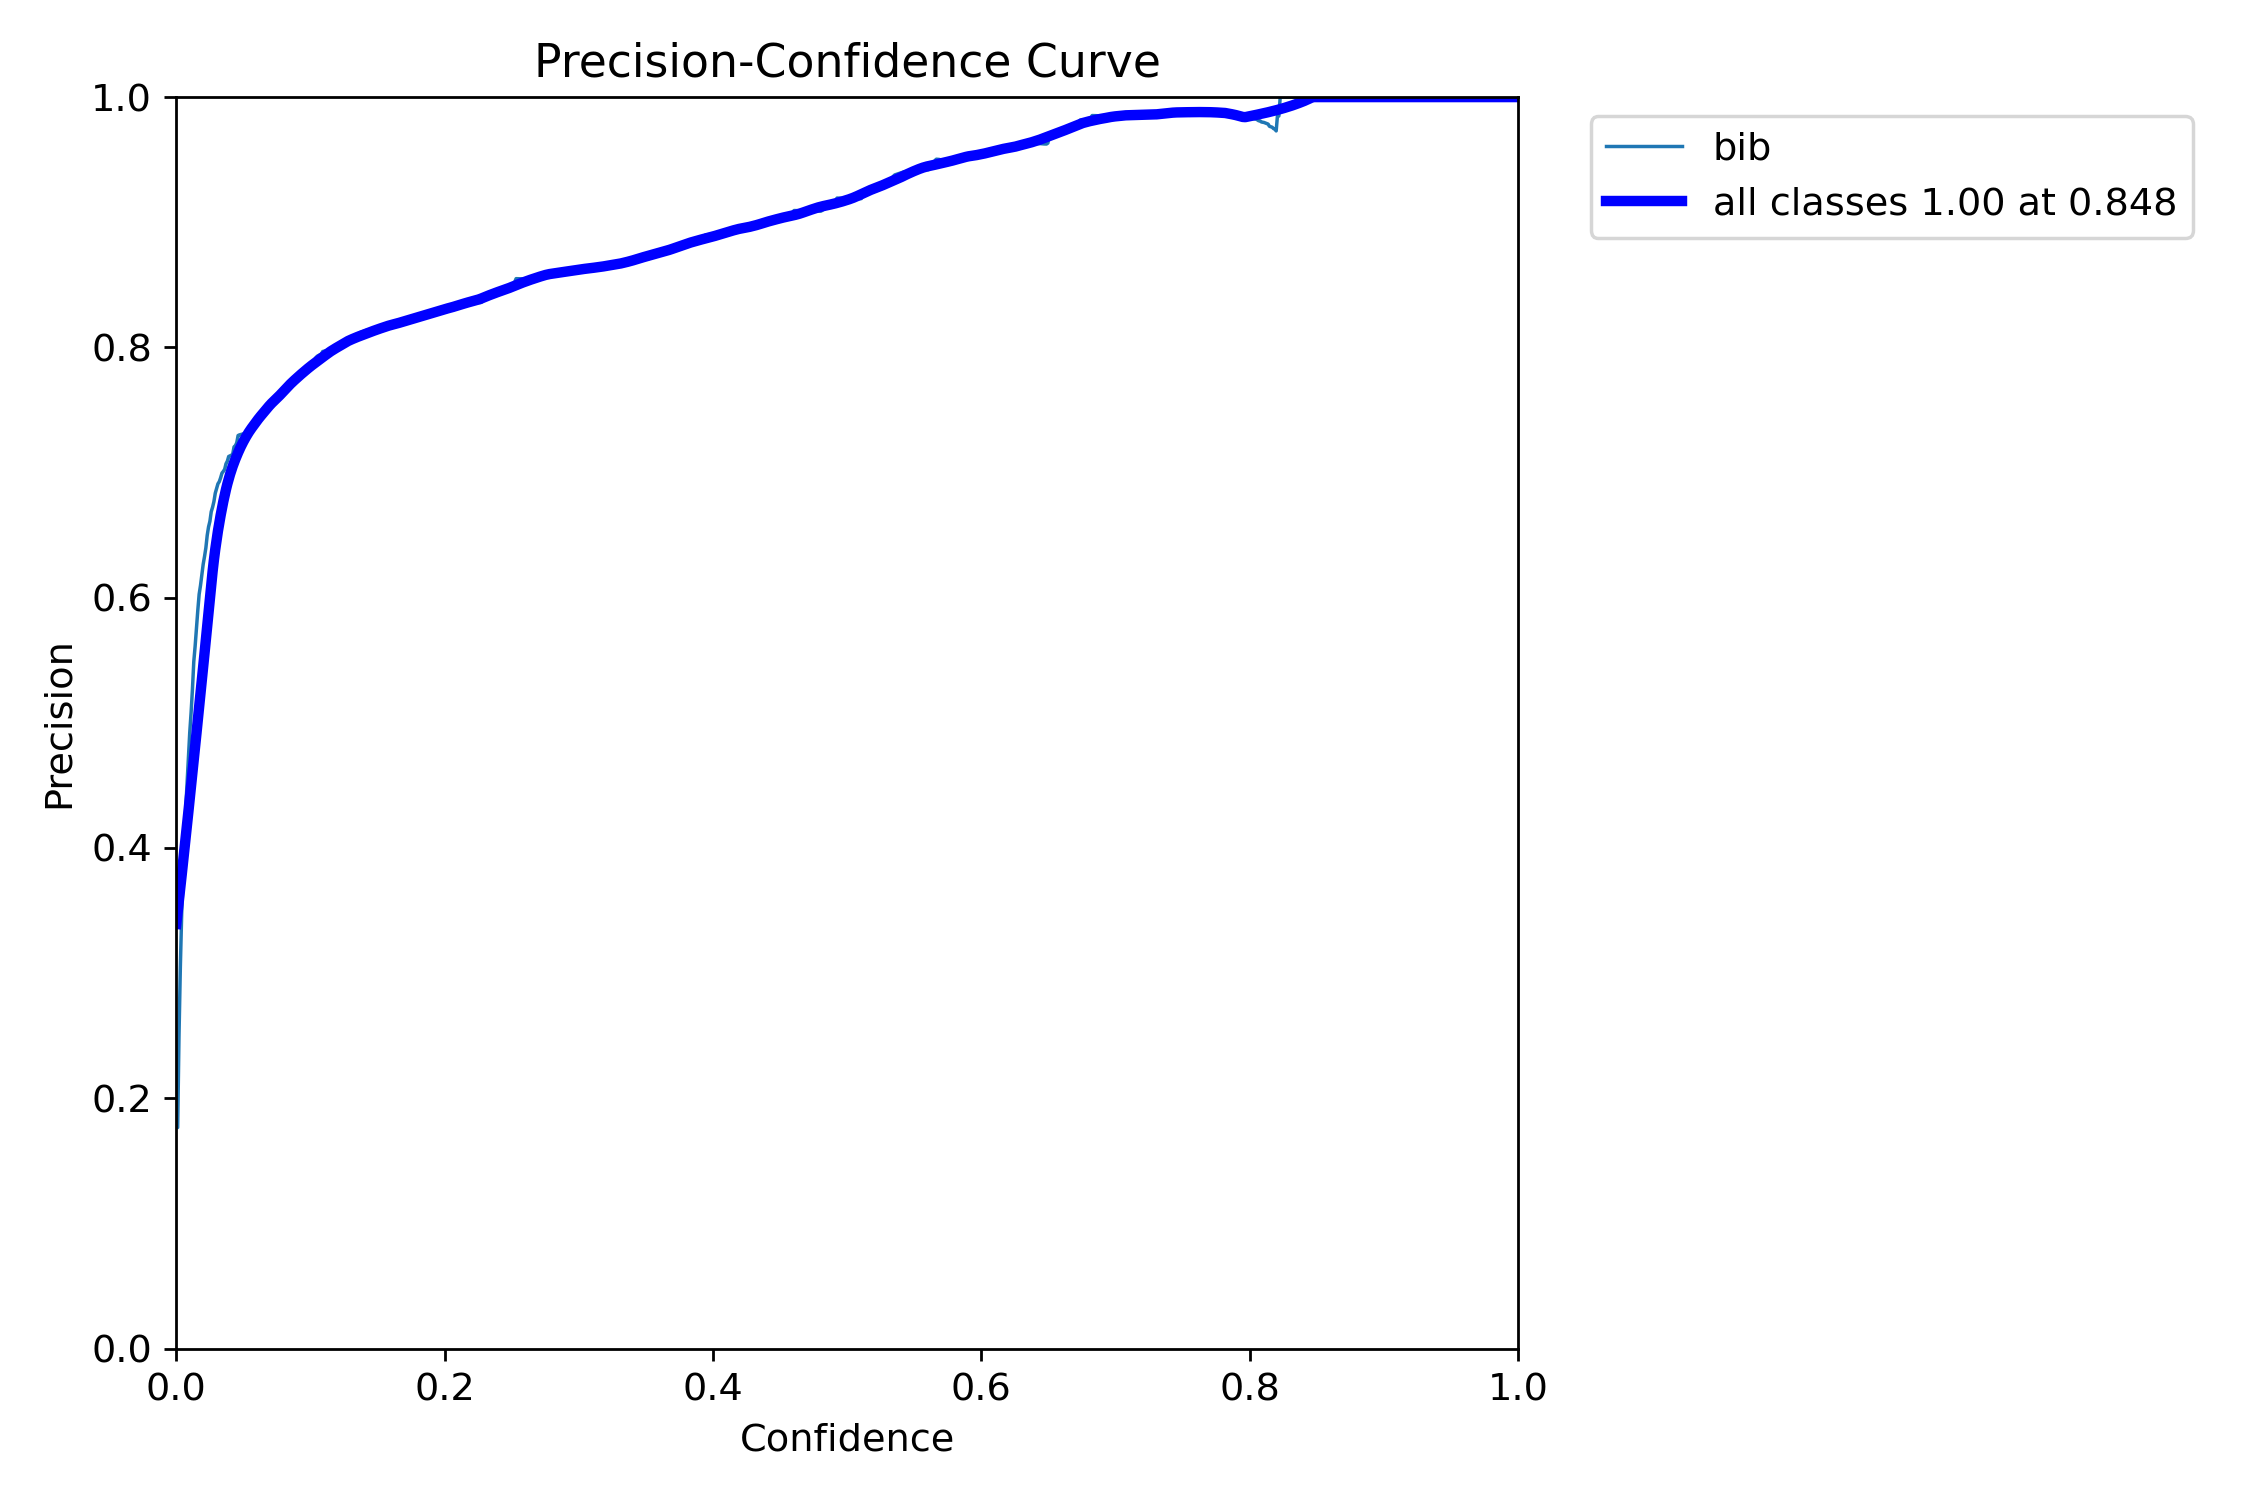

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

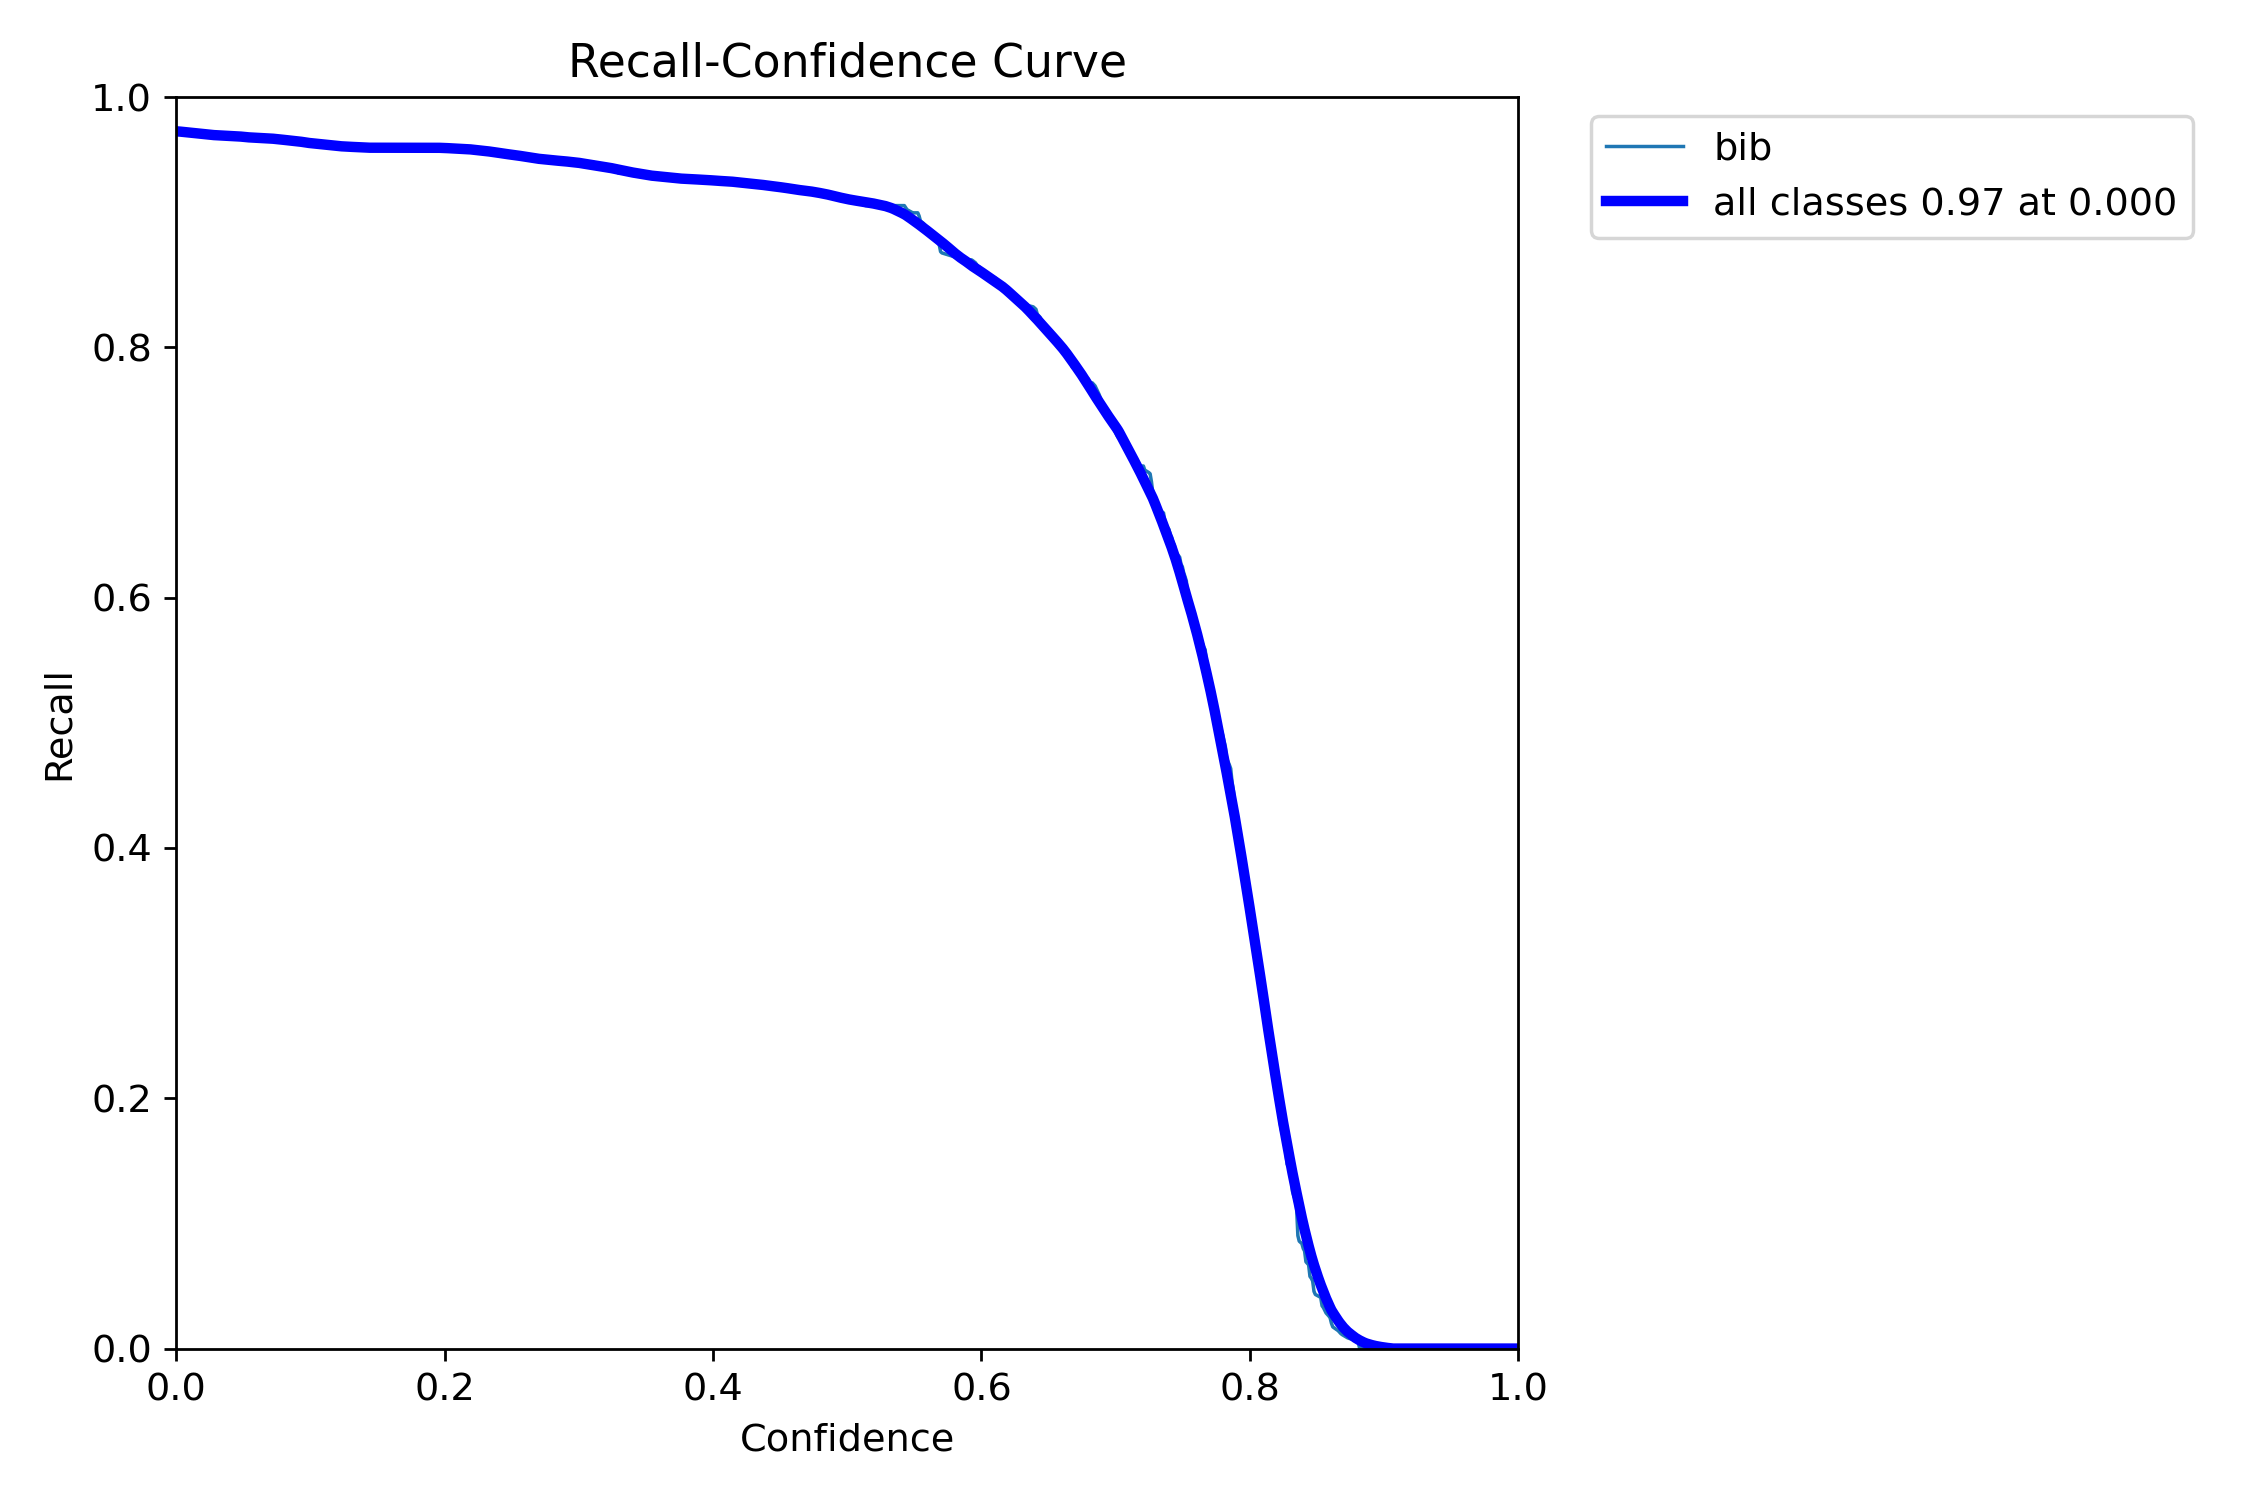

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

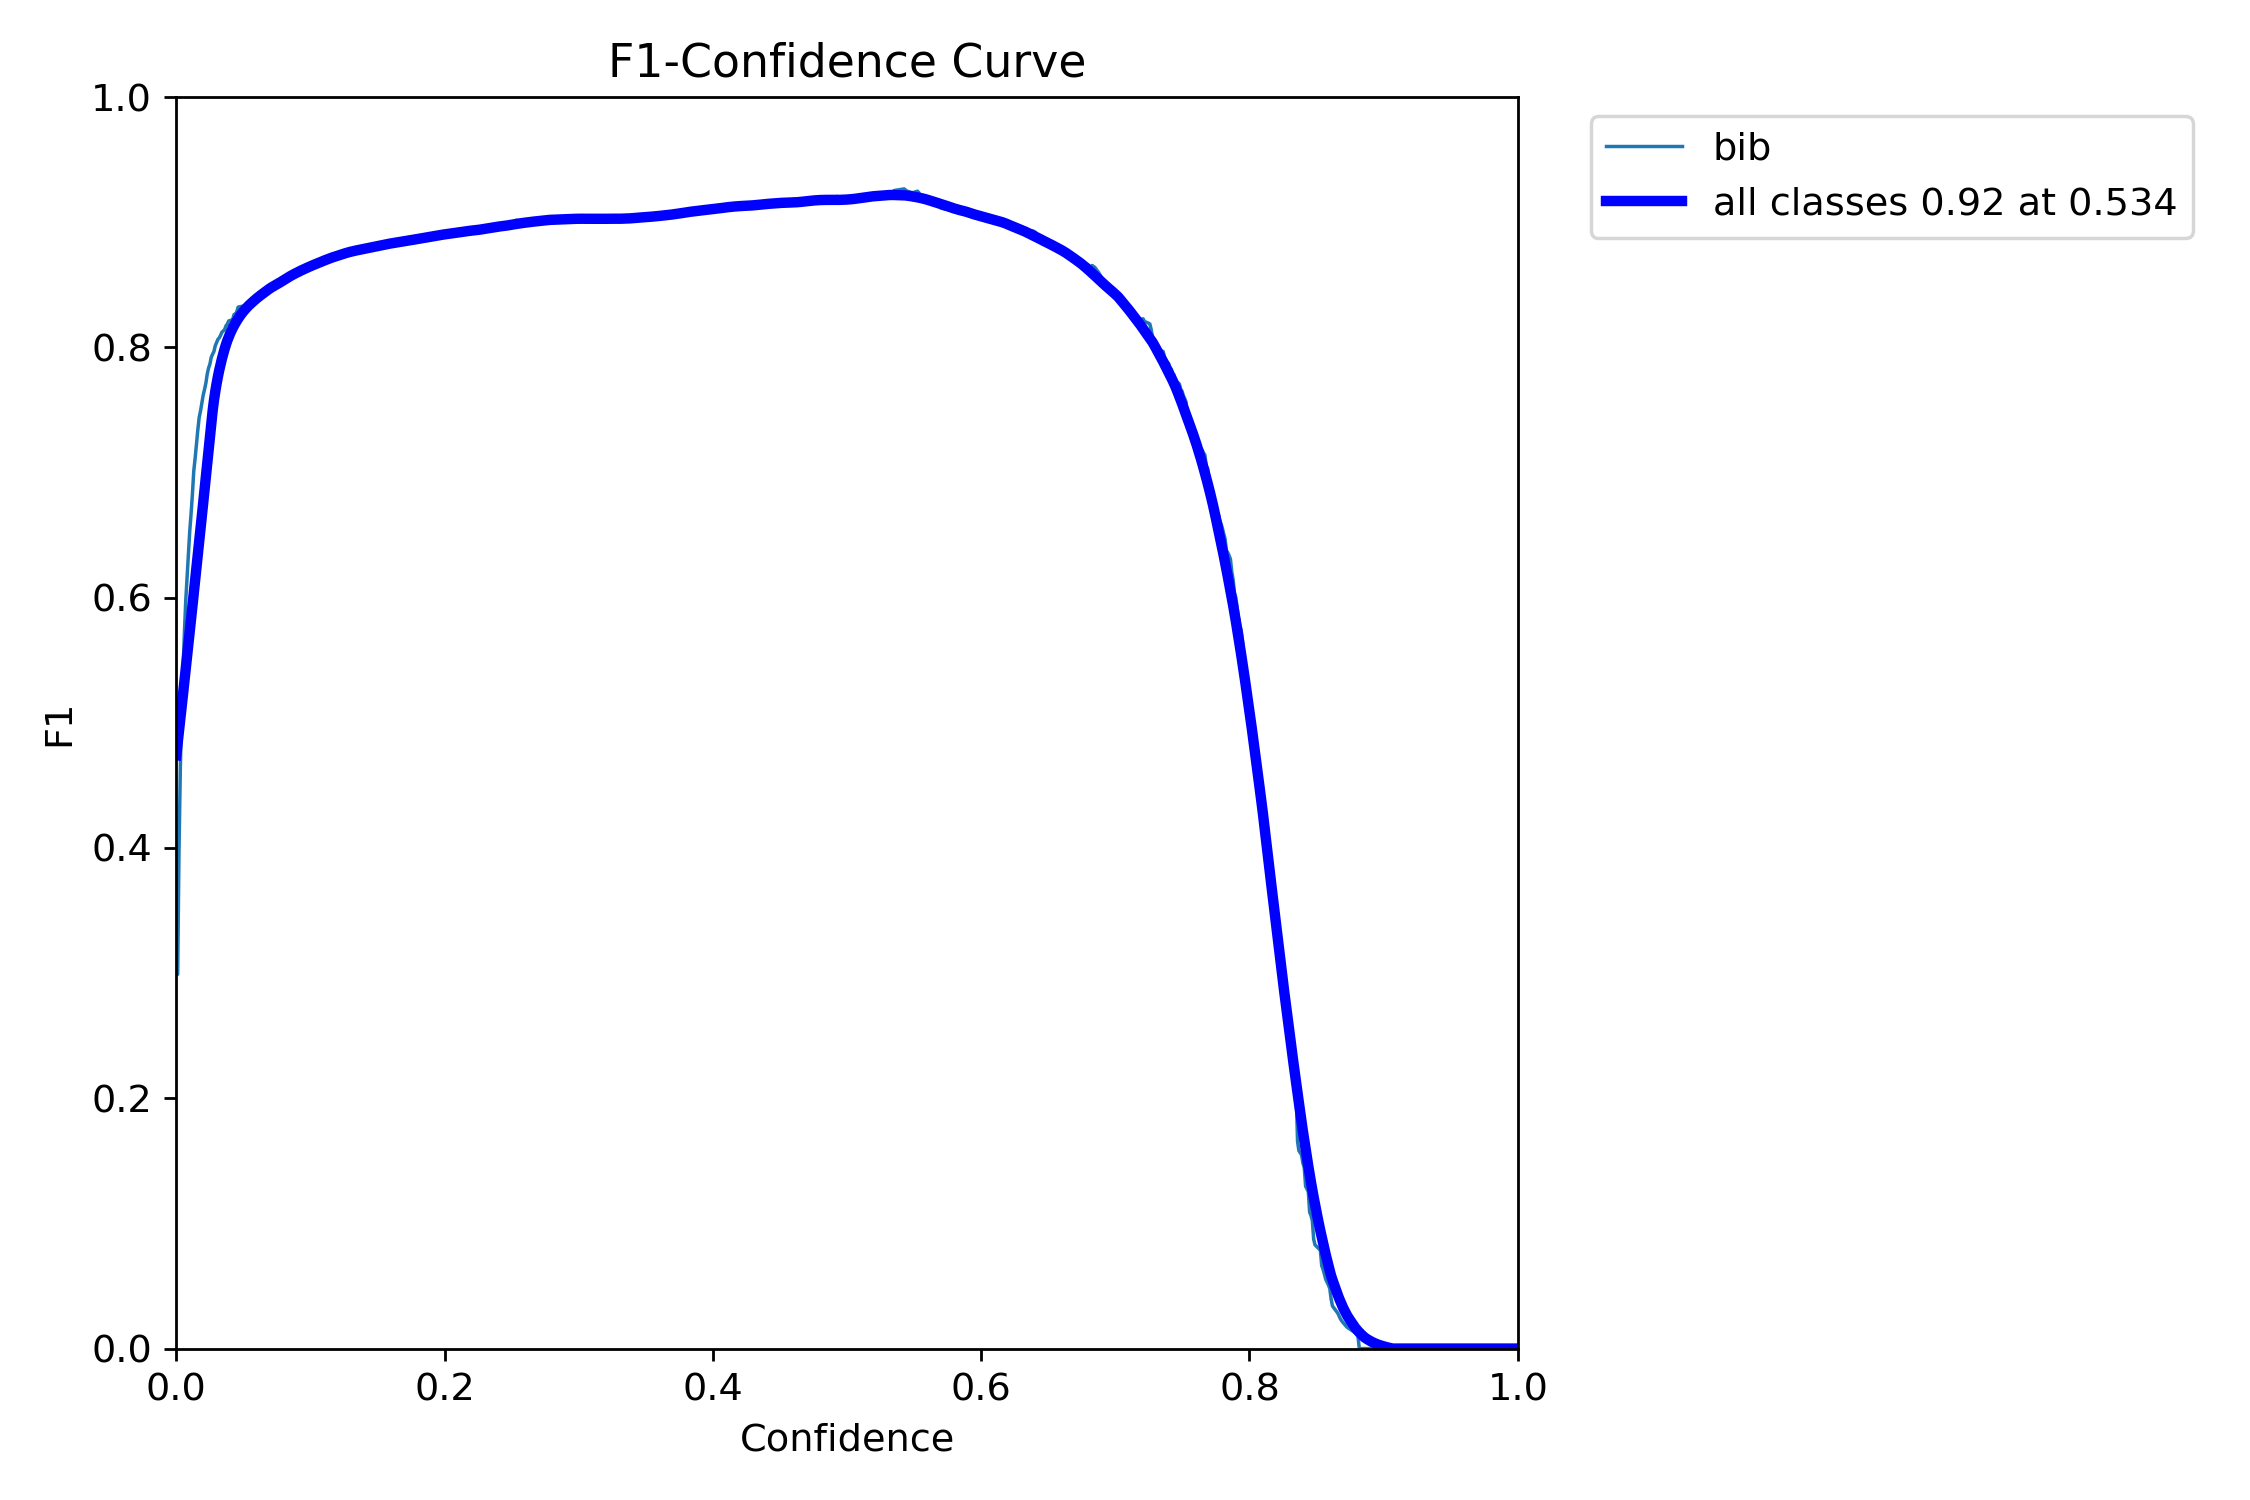

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


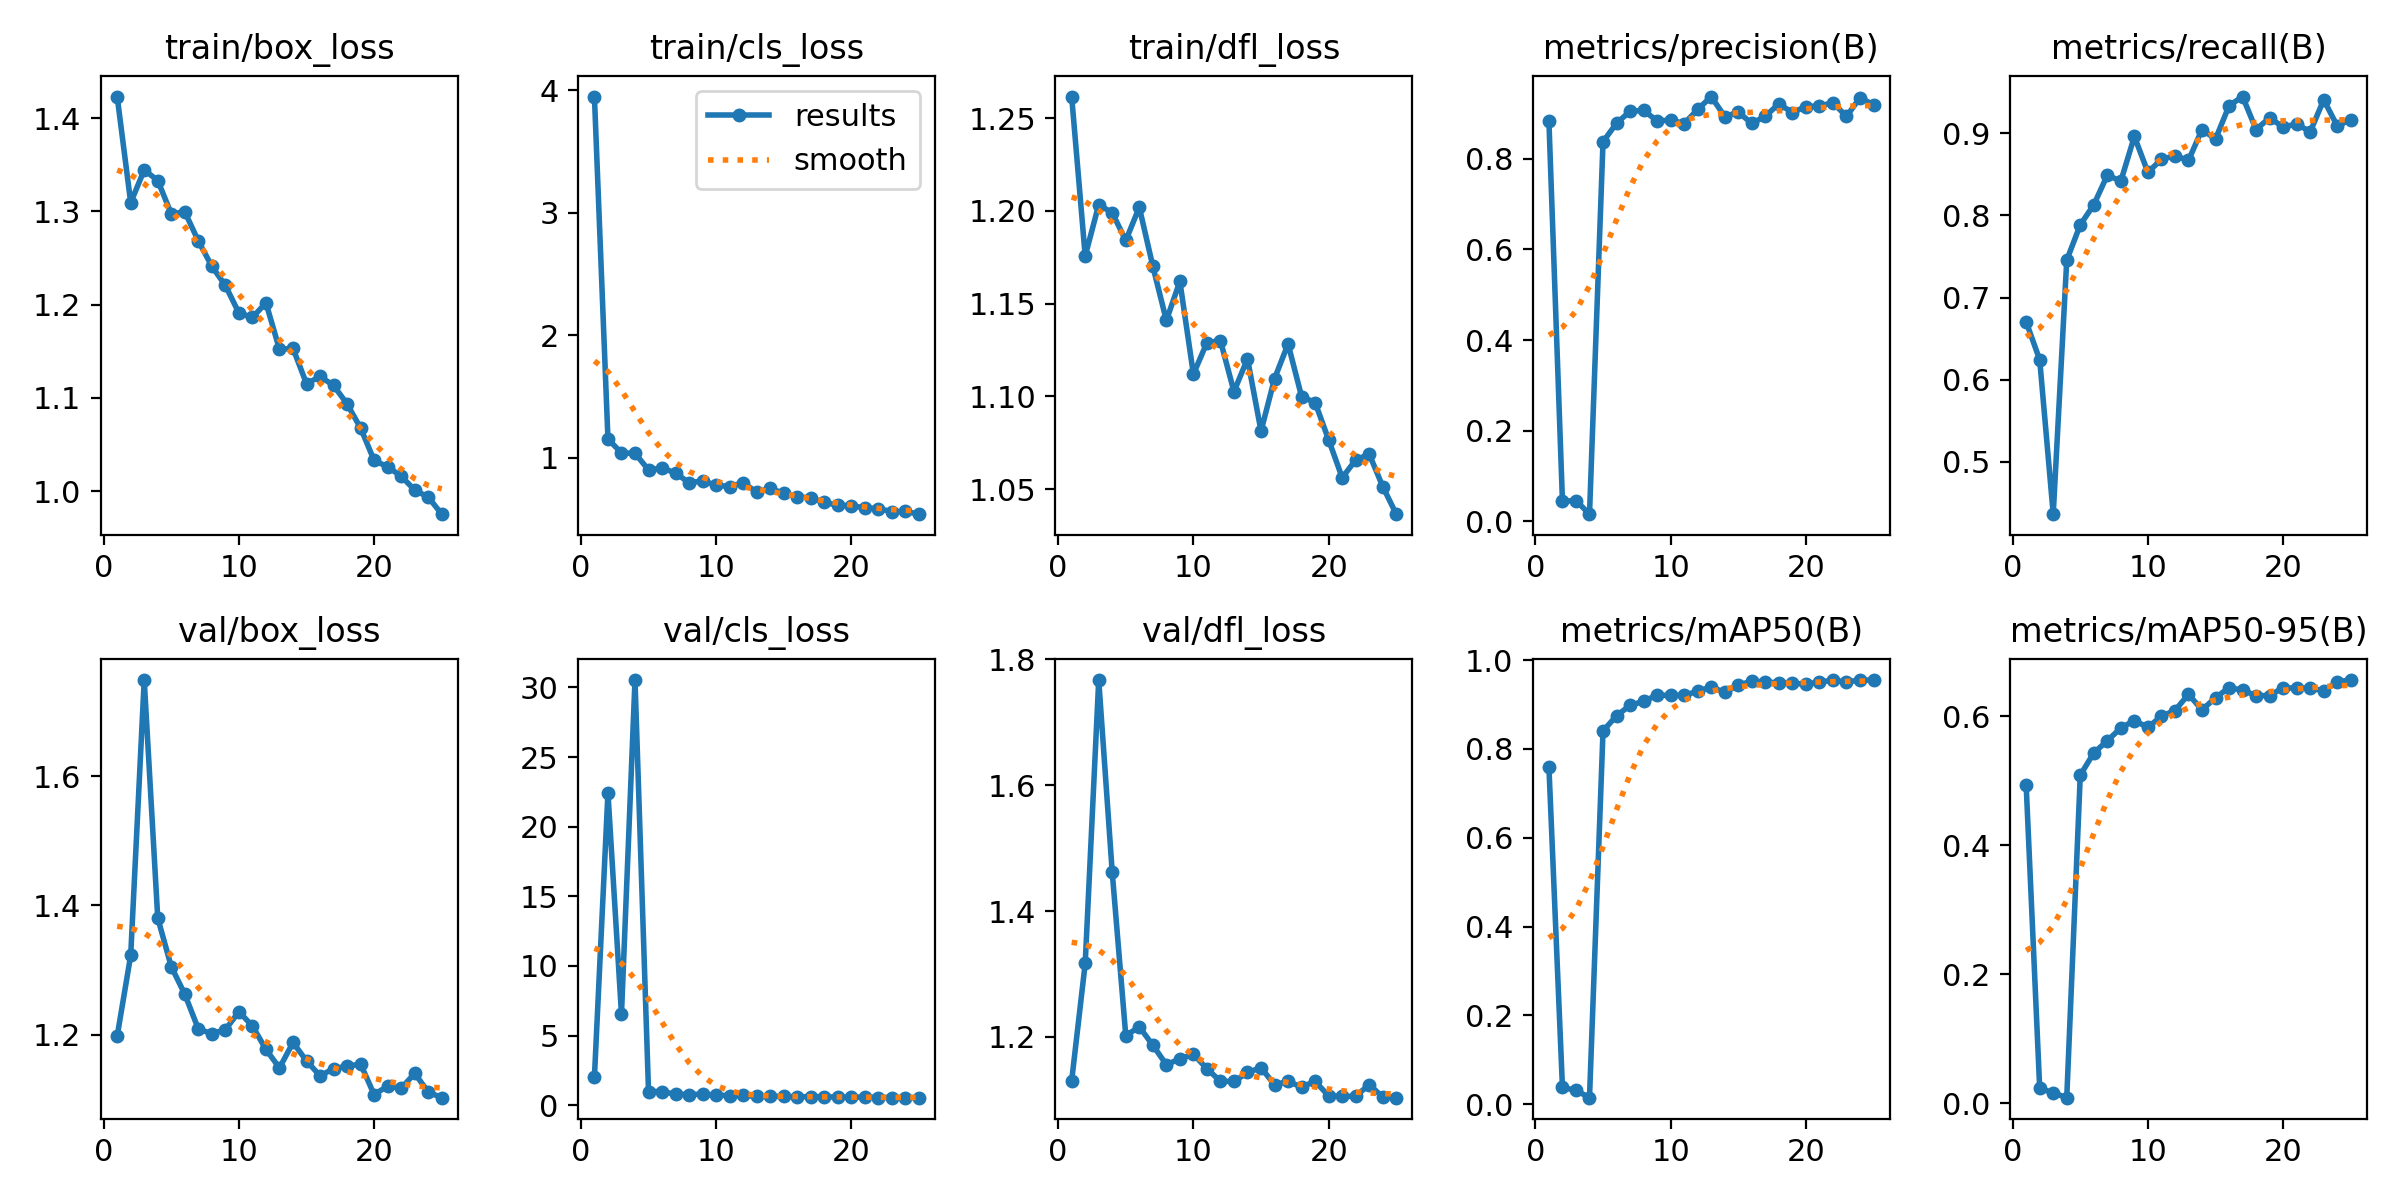

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


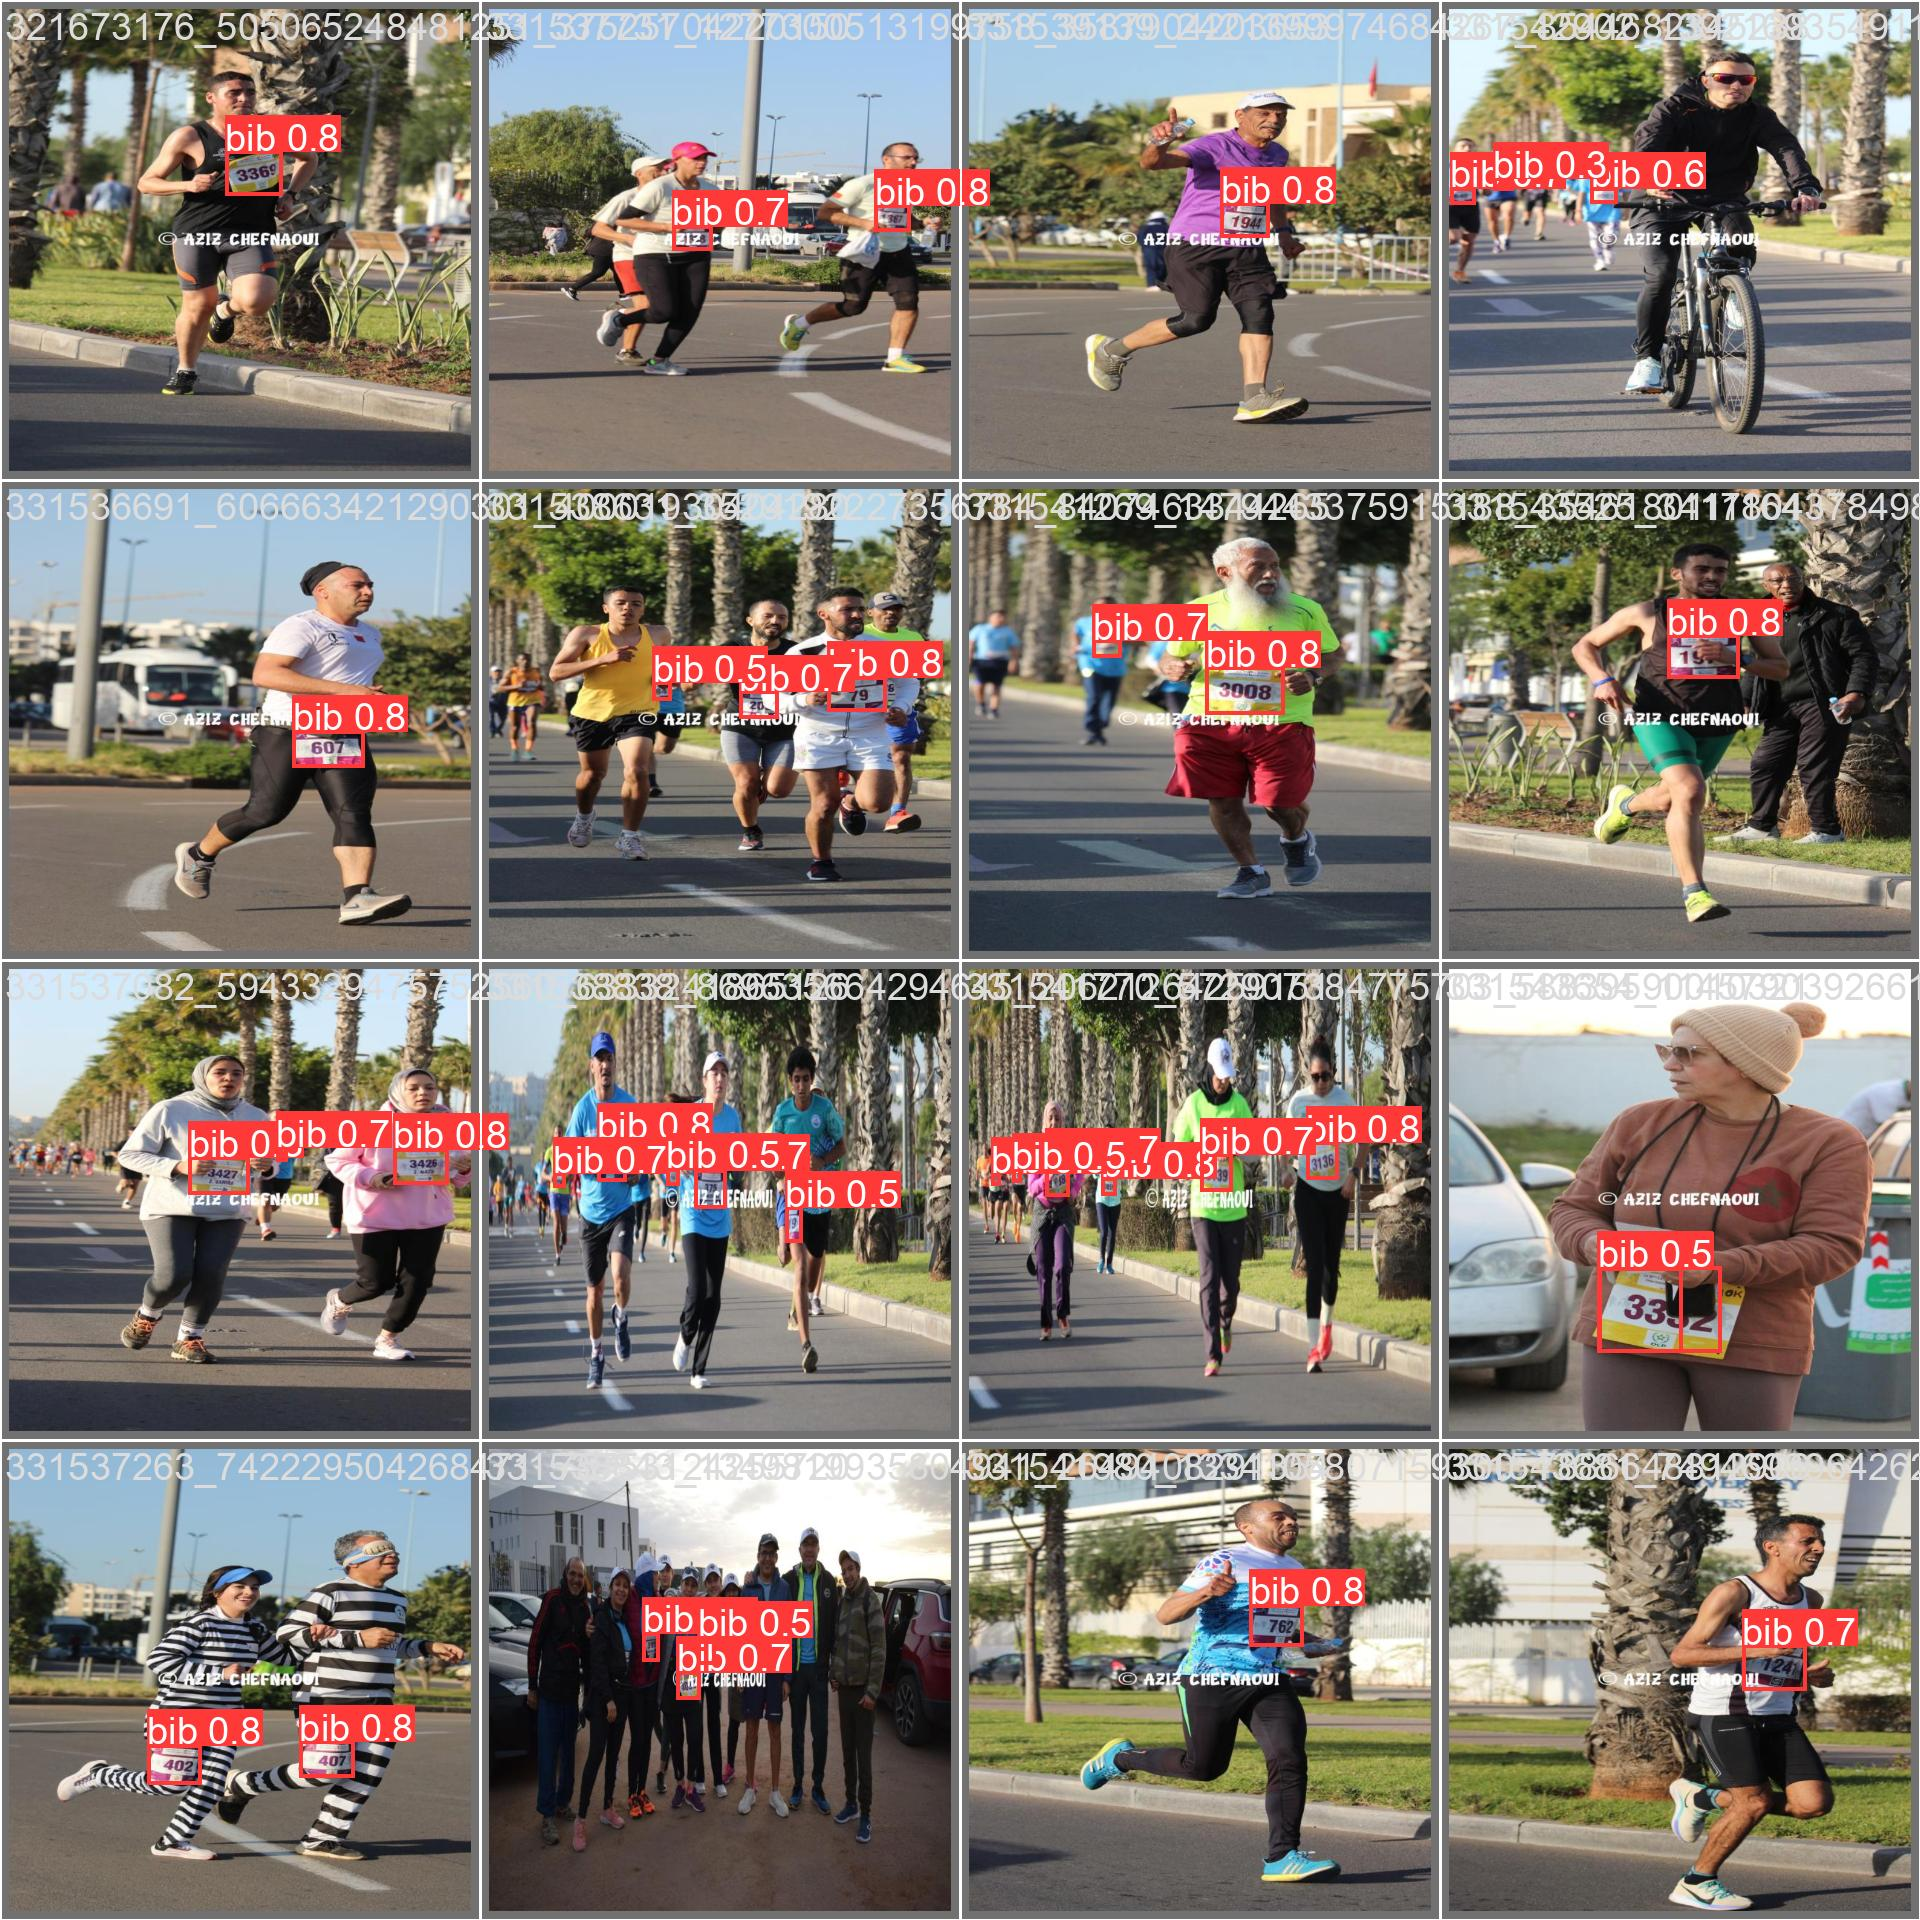

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Bib-Number-2/valid/labels.cache... 154 images, 1 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 197, len(boxes) = 346. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.40it/s]
                   all        154        346      0.916  

Le résultat de la validation indique que le modèle a été évalué sur **154 images** provenant de l'ensemble de validation. Il a détecté un total de** 346 instances** d'objets (bibs). La précision (P) et le rappel (R) des détections sont d'environ 0,916 et 0,914, respectivement. La précision moyenne (mAP) à un seuil de chevauchement (IoU) de 0,5 est de 0,955, et la mAP (mean average precision) à un seuil IoU variant de 0,5 à 0,95 est de 0,655. Ces métriques suggèrent que **le modèle se comporte bien dans la détection des numeros des dossards**, avec des scores de précision et de rappel élevés.


*   LmAP at IoU threshold of 0.5 (mAP50) represents the average precision across all classes when the IoU threshold is set to 0.5.
*  mAP at IoU threshold ranging from 0.5 to 0.95 (mAP50-95) represents the average precision across all classes when the IoU threshold varies from 0.5 to 0.95. This provides a broader evaluation of the model's performance across a range of IoU thresholds.ist item

En comparant les scores de performance entre les ensembles d'entraînement et de validation, nous concluons que le modèle a appris à généraliser efficacement à la fois aux données d'entraînement et de validation.




## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.15 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/75 /content/datasets/Bib-Number-2/test/images/319309273_6118836224899374_1526423061814566126_n_jpg.rf.efe8d9d3a3fd1ae882119d4a1890bd03.jpg: 800x800 2 bibs, 22.5ms
image 2/75 /content/datasets/Bib-Number-2/test/images/328956303_733991358169904_4294838335292437967_n_jpg.rf.39aabb5a2503b44948cd931365d4c33a.jpg: 800x800 11 bibs, 22.5ms
image 3/75 /content/datasets/Bib-Number-2/test/images/330964649_916308313122996_7042216905832680639_n_jpg.rf.3b1e9a468657086d5b3cb287ab10536b.jpg: 800x800 1 bib, 22.4ms
image 4/75 /content/datasets/Bib-Number-2/test/images/330966574_588861806094561_4505789010480392550_n_jpg.rf.37d22a8fb1f60633918ff85bd335235c.jpg: 800x800 8 bibs, 22.4ms
image 5/75 /content/datasets/Bib-Number-2/test/images/330980290_2974985172644823_2683293368185896610_n_jpg.rf.4d47b765823c7e9f30a7c94ca63f38

**NOTE:** Let's take a look at few results.

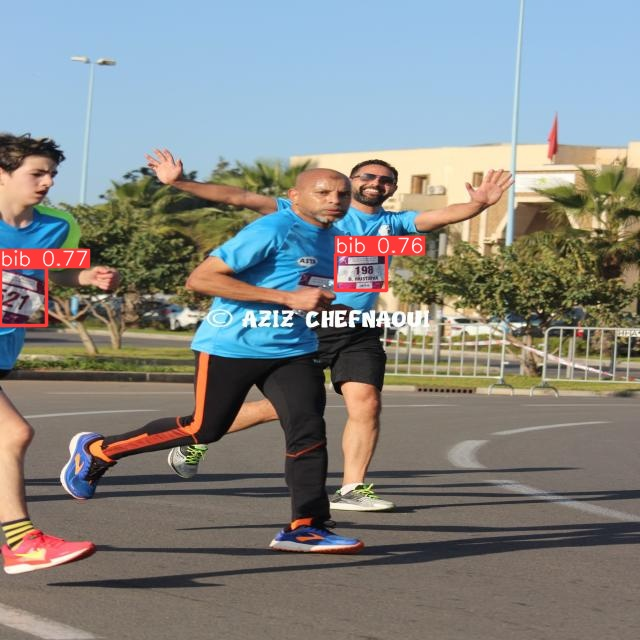

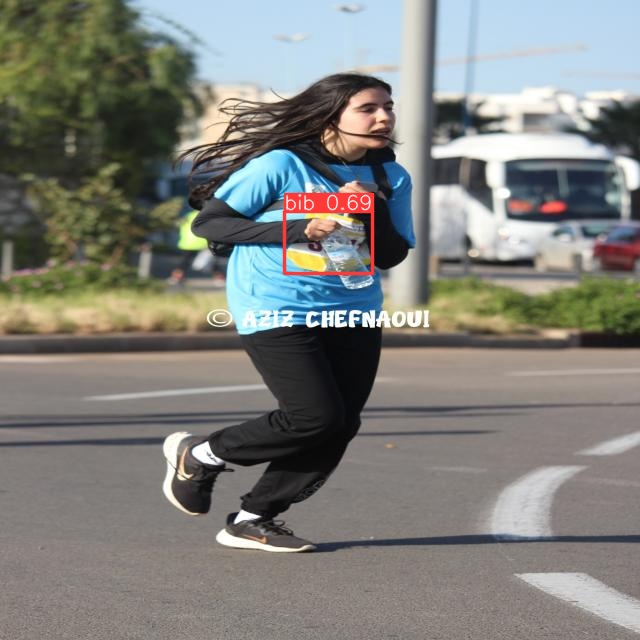

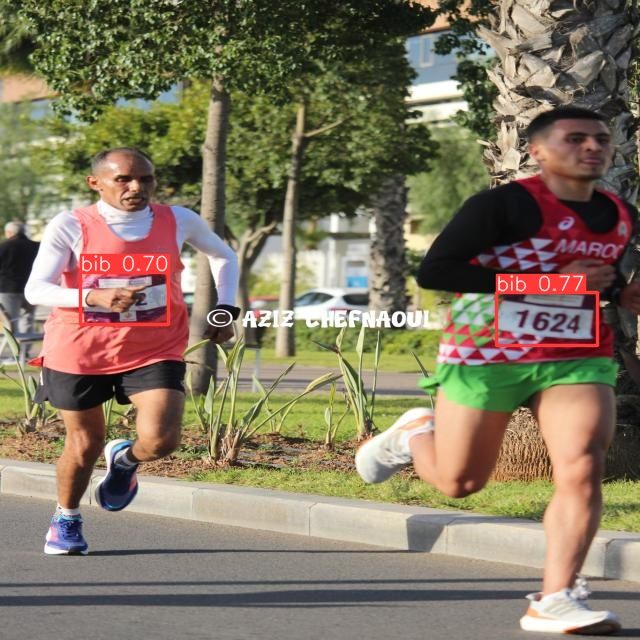

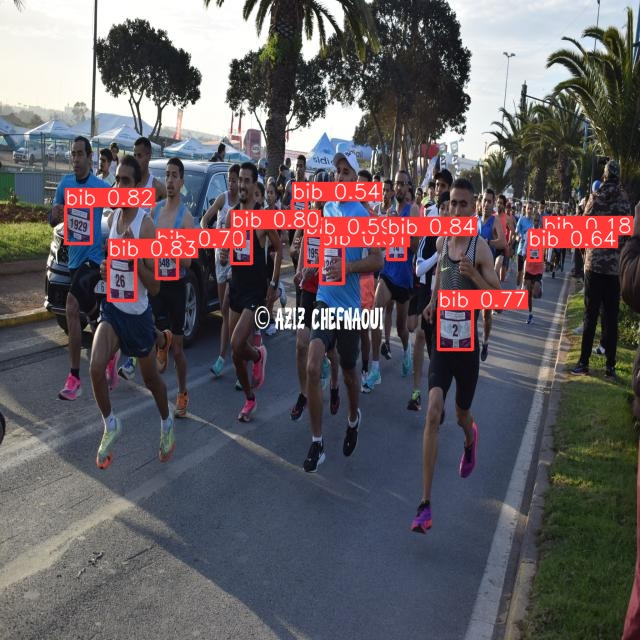

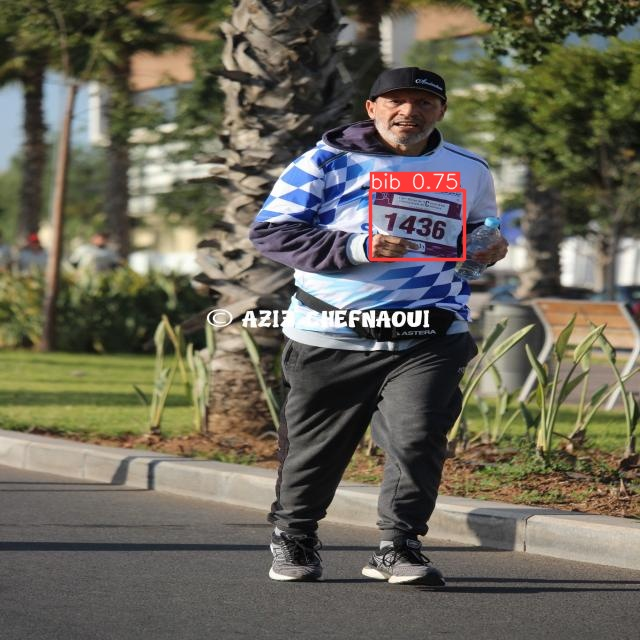

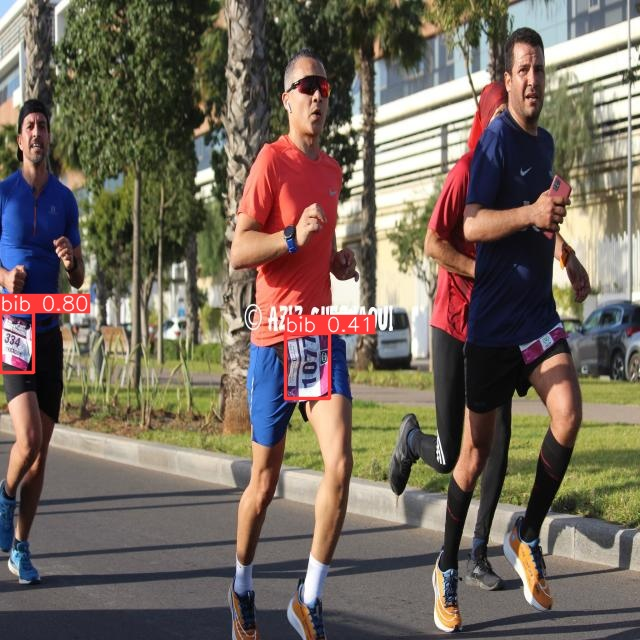

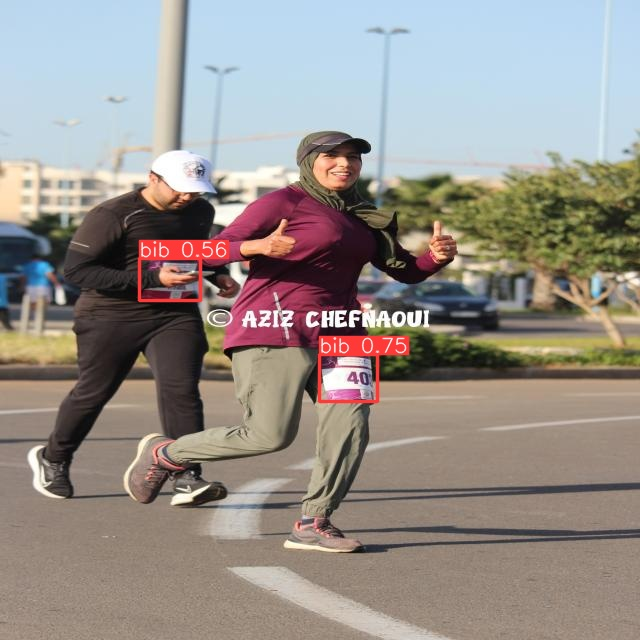

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:7]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Déploiement du modèle sur Roboflow

le déploiement de notre modèle sur une infrastructure cloud robuste et évolutive. Après avoir consacré du temps et des ressources à

*   List item
*   List item

l'entraînement de notre modèle YOLOv8, nous avons obtenu des poids entraînés qui sont prêts à être utilisés pour effectuer des prédictions sur de nouvelles données.

Nos précieux poids de modèle se trouvent dans le répertoire **/runs/detect/train/weights/best.pt** de notre projet. Maintenant, grâce à Roboflow Deploy, nous pouvons les télécharger et les utiliser sur leur infrastructure infiniment scalable.

La fonction .deploy() dans le package Roboflow pip nous simplifie grandement la tâche en nous permettant de télécharger facilement nos poids de modèle YOLOv8.

Pour exécuter cette opération, nous avons intégré le code suivant à la section "Inférence avec modèle personnalisé" de notre notebook :

In [ ]:
project.version(dataset.version).deploy(model_type="yolov9", model_path=f"{HOME}/runs/detect/train/")

Cela nous permettra d'accéder à notre modèle entraîné à tout moment, et où que nous soyons, pour effectuer des prédictions rapides et précises sur de nouvelles données. C'est une étape cruciale pour transformer notre modèle en une solution déployable dans le monde réel.

Nous passons à l'étape d'inférence de notre modèle à l'aide d'une API cloud persistante et auto-évolutive. Après avoir chargé notre modèle en utilisant les poids entraînés que nous avons précédemment déployés, nous sélectionnons aléatoirement une image de notre ensemble de test. Ensuite, nous utilisons le modèle pour effectuer des prédictions sur cette image spécifique. Les résultats sont renvoyés sous forme de réponse JSON, nous permettant d'analyser les prédictions de notre modèle.


In [ ]:
#effectuee une inférence sur notre modèle à l'aide d'une API cloud persistante et auto-évolutive

# Chargement du modèle
model = project.version(dataset.version).model

# Choix aléatoire d'une image de l'ensemble de test
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)



# Déployer notre modèle sur le bord

---



En plus d'utiliser l'API hébergée de Roboflow pour le déploiement, nous pouvons utiliser Roboflow Inference, une solution d'inférence open source qui a alimenté des millions d'appels API dans des environnements de production. L'inférence fonctionne avec CPU et GPU, en donnant un accès immédiat à une gamme d'appareils, du NVIDIA Jetson aux appareils compatibles TRT en passant par les appareils CPU ARM.

Avec Roboflow Inference, nous pouvons auto-héberger et déployer votre modèle sur l'appareil. nous pouvons déployer des applications en utilisant les conteneurs Docker Inference ou le package pip.

Par exemple, pour installer Inference sur un appareil avec un GPU NVIDIA, nous pouvons utiliser :

```
docker pull roboflow/roboflow-inference-server-gpu
```

Ensuite, nous pouvons exécuter l'inférence via HTTP :

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```
Dans le code ci-dessus, définissez notre ID d'espace de travail Roboflow, l'ID du modèle et la clé API.

Trouvez notre ID d'espace de travail et d'ID de modèle
Trouvez notre clé API
De plus, définissez l'URL d'une image sur laquelle vous souhaitez exécuter l'inférence. Cela peut être un fichier local.
